Day of Data 2020 - January 10th, 2020
# Data Visualization Challenge
## UMN Building Energy Benchmarking Data

This is short script that loads the energy dataset into Python and gets you started exploring the data

## Install and load libraries

In [53]:
import numpy as np

# Data manipulation and loading
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

# Data visualization
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns
print("seaborn version: ", sns.__version__)

# Set plotting style
sns.set(style="darkgrid")

seaborn version:  0.9.0


## Import data into Python

In [38]:
file = "U of M Buildings Space and Utility Data - Simplified and Cleaned.xlsx"

buildings = pd.read_excel(file, sheet_name='Buildings', parse_dates=True, index_col='bldg_nbr')
space_usages = pd.read_excel(file, sheet_name='Building Space Usages', parse_dates=True, index_col='bldg_nbr')
baseline = pd.read_excel(file, sheet_name='Baseline', parse_dates=True, index_col='bldg_nbr')
monthly = pd.read_excel(file, sheet_name='Monthly Consumption by Site', parse_dates=True, index_col='bldg_nbr')
res_hall = pd.read_excel(file, sheet_name='Monthly Consumption - Res Halls', parse_dates=True, index_col='bldg_nbr')

## Exploratory data analysis

In [39]:
# Preview the column names and data types in a dataframe
buildings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224 entries, 61 to 189
Data columns (total 28 columns):
bldg_name                  224 non-null object
address                    224 non-null object
city                       224 non-null object
state                      224 non-null object
zip                        224 non-null int64
status                     224 non-null object
status_message             224 non-null object
current_sf                 224 non-null int64
original_occupancy_date    224 non-null object
bldg_type                  224 non-null object
space_area_asset_1         224 non-null object
saa_pct_1                  224 non-null float64
saa_sf_1                   224 non-null float64
spact_area_asset_2         205 non-null object
saa_pct_2                  205 non-null float64
saa_sf_2                   205 non-null float64
space_area_asset_3         165 non-null object
saa_pct_3                  165 non-null float64
saa_sf_3                   165 non-null float64
sp

In [40]:
# Get summary statistics about the columns in a dataframe
baseline.describe()

,current_sf,current_eui_kbtu_per_sf,baseline_eui_kbtu_per_sf,change_from_baseline,pct_change_from_baseline
count,224.000000,224.000000,222.000000,222.000000,222.000000
mean,114145.683036,146.434577,164.595320,-17.277442,-0.011265
std,131936.263166,116.523746,129.550033,70.776752,0.877658
min,0.000000,0.000000,2.205906,-337.767910,-1.000000
25%,27599.000000,72.184462,76.953528,-36.301653,-0.244459
50%,80321.500000,111.514310,124.325245,-8.381858,-0.092726
75%,145578.000000,206.404399,231.074858,2.860844,0.026394
max,861524.000000,755.174757,967.325404,323.864320,10.914526


## Select, filter, and join dataframes

In [41]:
# Drop unnecessary columns
baseline_cleaned = baseline.drop(columns=['bldg_name', 'bldg_type', 'current_sf'])

In [42]:
# Join the baseline dataframe and the buildings dataframe, using 'bldg_nbr' as a key
baseline_bldg = baseline_cleaned.merge(buildings, on='bldg_nbr')
baseline_bldg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224 entries, 61 to 189
Data columns (total 36 columns):
current_eui_kbtu_per_sf     224 non-null float64
actual_period               224 non-null object
baseline_eui_kbtu_per_sf    222 non-null float64
baseline_period             224 non-null object
change_from_baseline        222 non-null float64
pct_change_from_baseline    222 non-null float64
first_reading               224 non-null datetime64[ns]
last_reading                224 non-null datetime64[ns]
bldg_name                   224 non-null object
address                     224 non-null object
city                        224 non-null object
state                       224 non-null object
zip                         224 non-null int64
status                      224 non-null object
status_message              224 non-null object
current_sf                  224 non-null int64
original_occupancy_date     224 non-null object
bldg_type                   224 non-null object
space_area_asset_

In [43]:
# Filter for buildings that have a status of 'OK' and are > 100000 square feet
baseline_bldg_filtered = baseline_bldg[(baseline_bldg['status'] == 'OK') & (baseline_bldg['current_sf'] > 100000)]

## Make some basic data visualizations

### Scatter plot

https://seaborn.pydata.org/tutorial/relational.html#relating-variables-with-scatter-plots

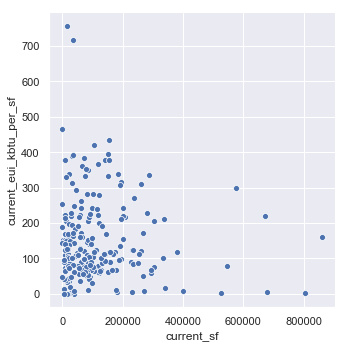

In [11]:
# Current square footage vs. efficiency
sns.relplot(x="current_sf", y="current_eui_kbtu_per_sf", data=baseline_bldg)

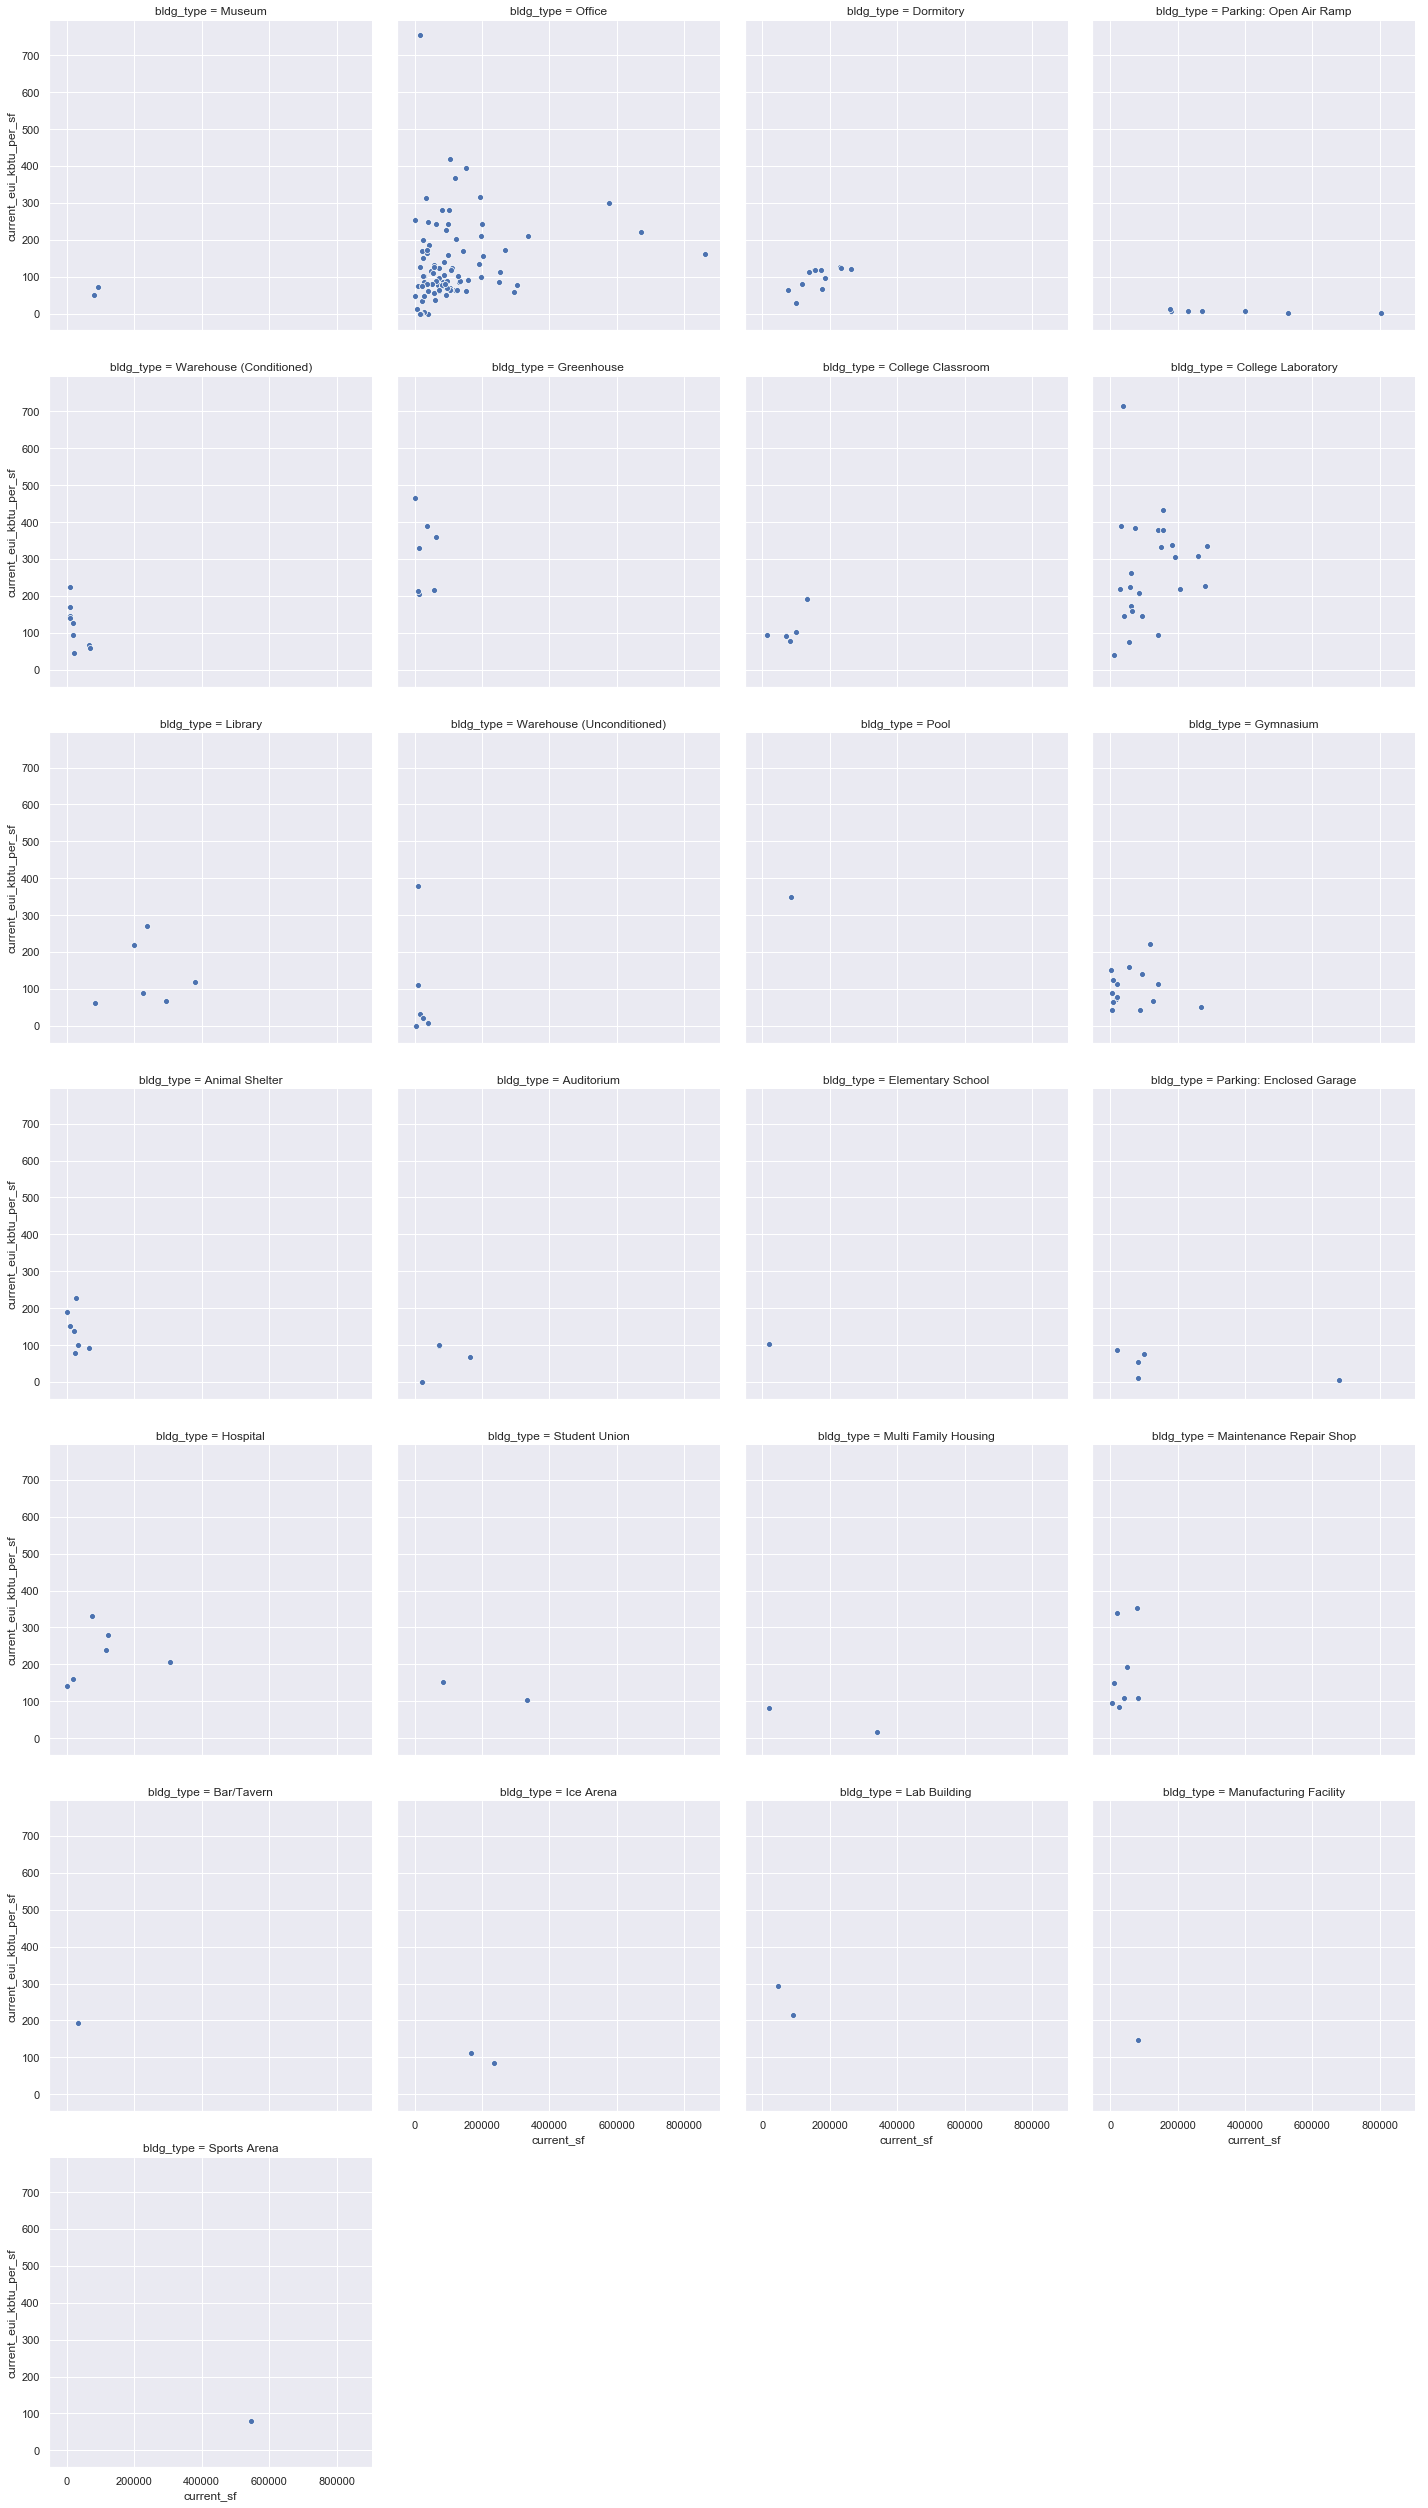

In [30]:
# Facet by building type
sns.relplot(x="current_sf", 
            y="current_eui_kbtu_per_sf", 
            col="bldg_type", 
            col_wrap=4,
            data=baseline_bldg)

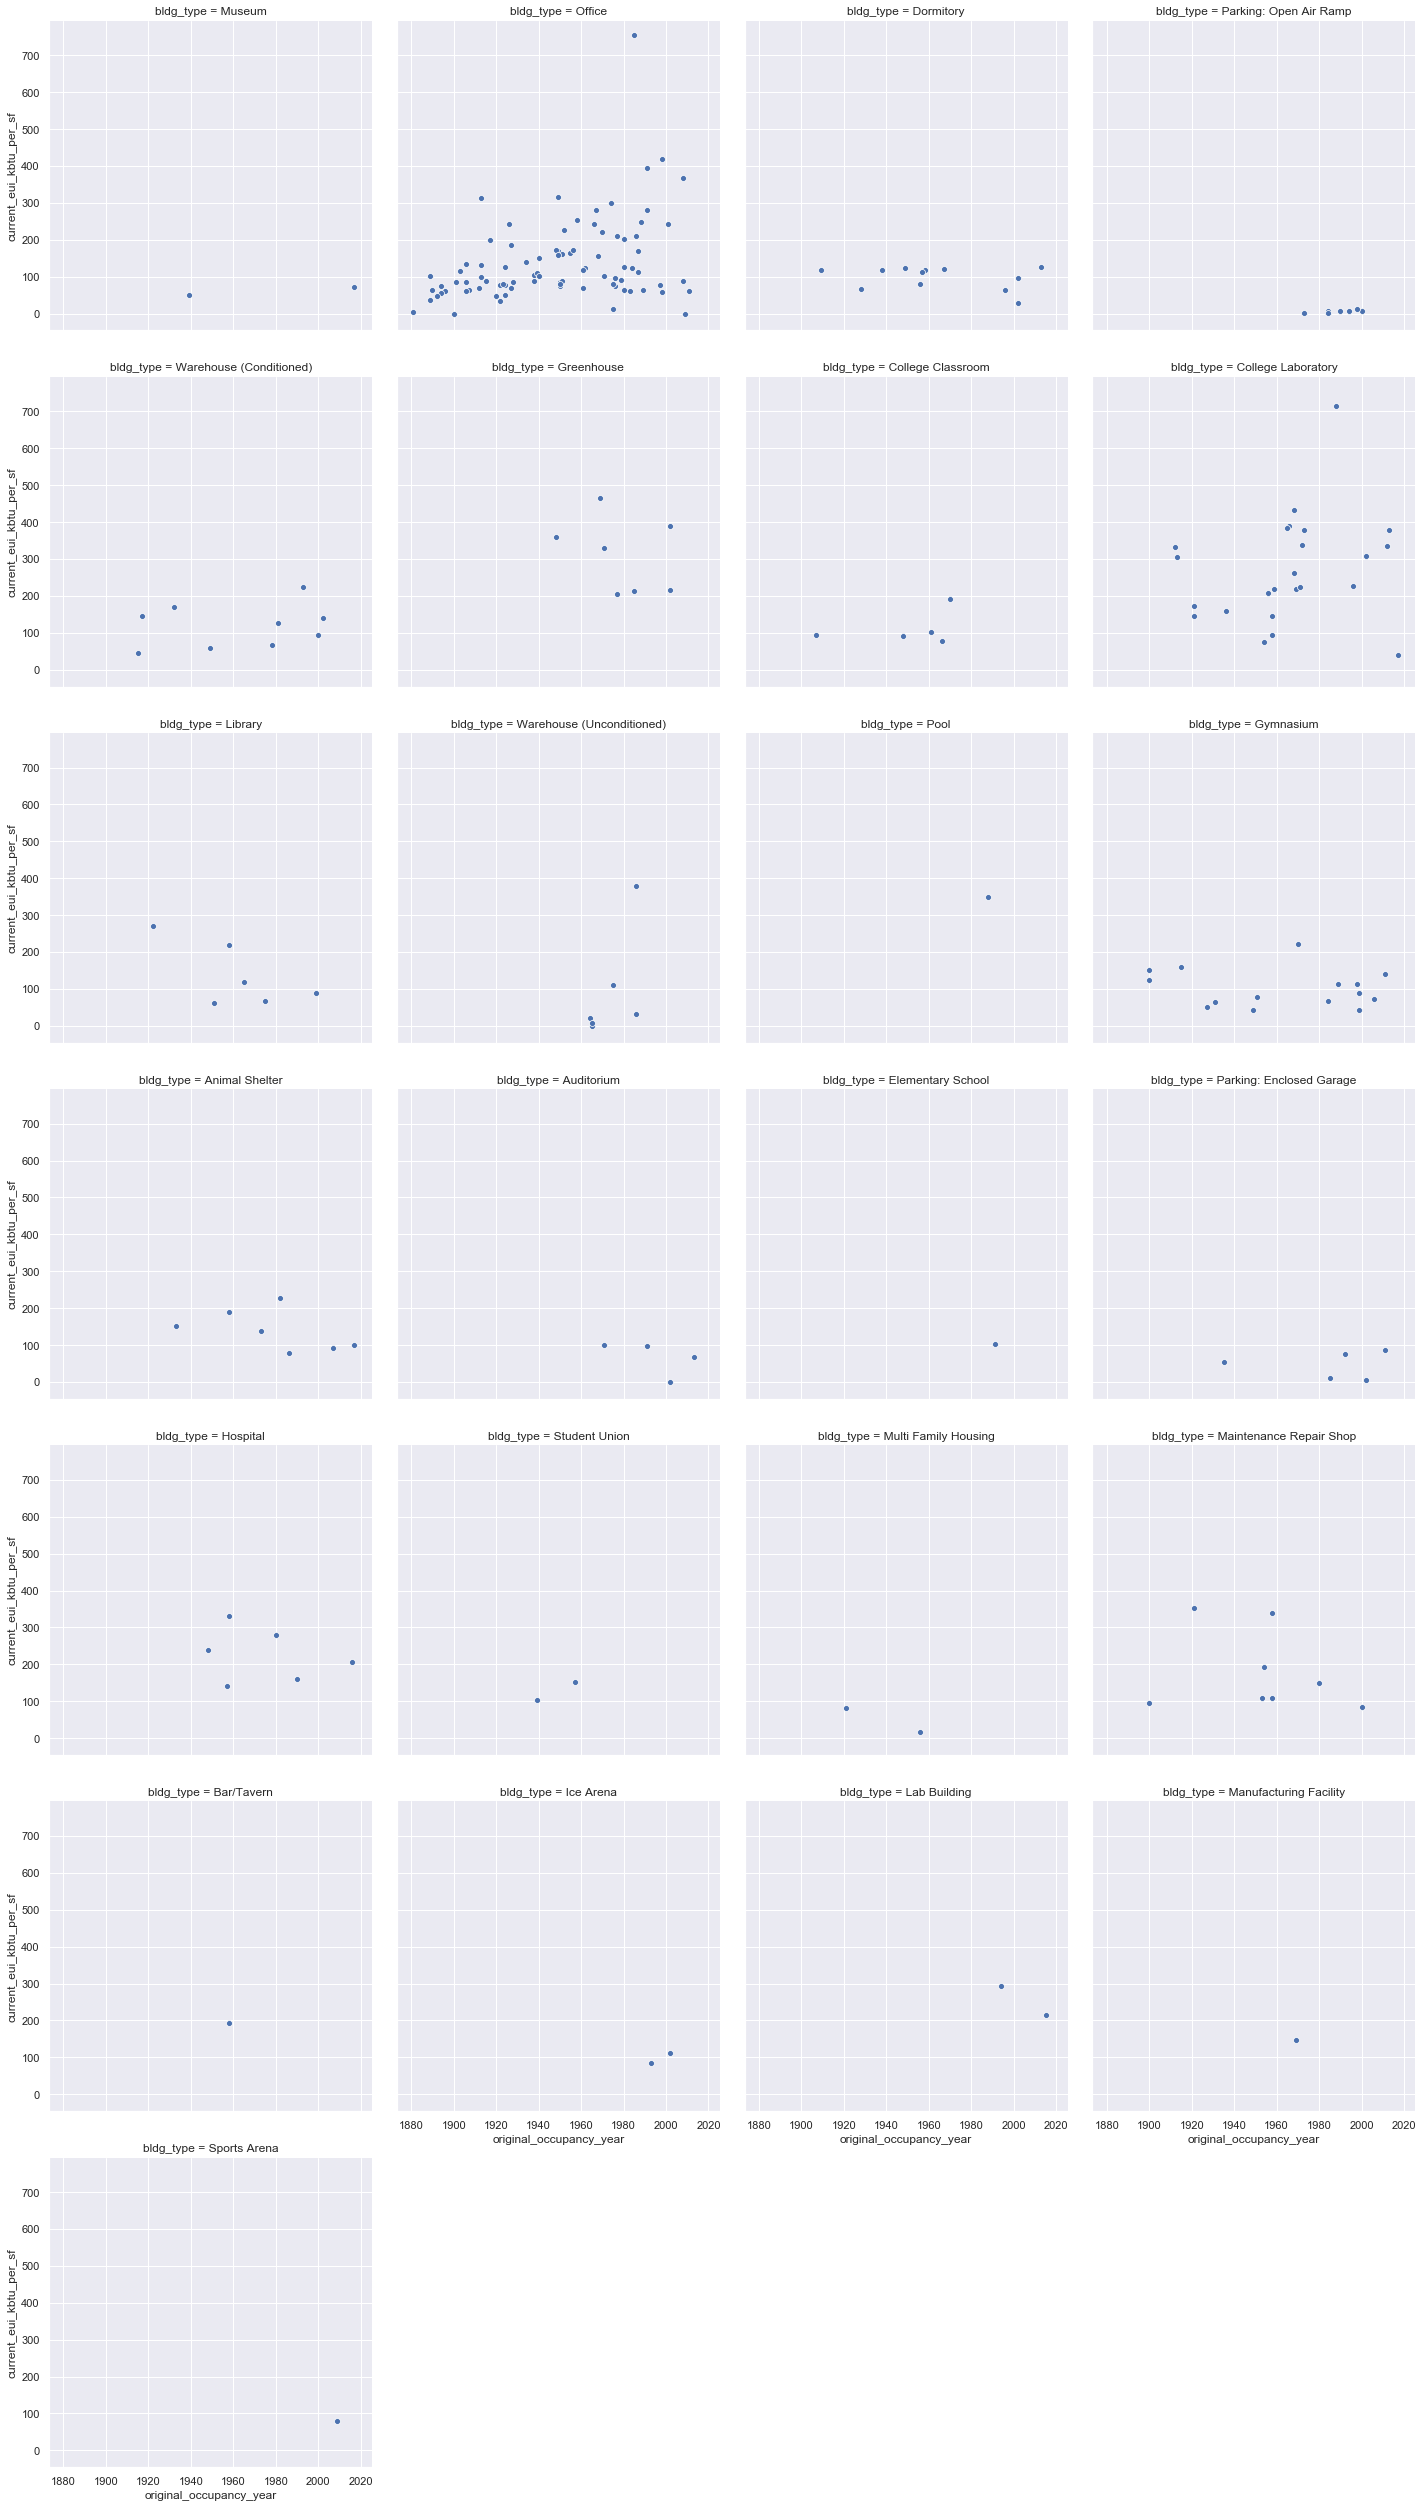

In [44]:
# Year the building was first occupied vs. efficiency, facet by building type

# Extract the year from the 'original_occupancy_date' column and store it to a new column
baseline_bldg['original_occupancy_year'] = pd.DatetimeIndex(baseline_bldg['original_occupancy_date']).year

# Create the plot
sns.relplot(x="original_occupancy_year", 
            y="current_eui_kbtu_per_sf", 
            col="bldg_type", 
            col_wrap=4, 
            data=baseline_bldg)

### Box plot

https://seaborn.pydata.org/generated/seaborn.boxplot.html

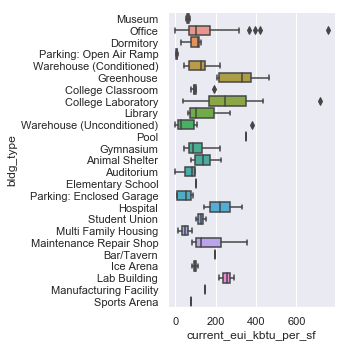

In [45]:
# Efficiency by building type 
sns.catplot(x="current_eui_kbtu_per_sf", y="bldg_type", kind="box", data=baseline_bldg)

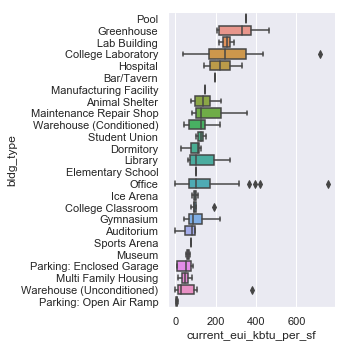

In [46]:
# Calculate the median within each building type, then sort by this value to determine the plot order.
# Store this as an index object we can pass to the plot.
sorted_order = baseline_bldg.groupby(by=["bldg_type"])["current_eui_kbtu_per_sf"].median().sort_values(ascending=False).index

# Create the plot
sns.catplot(x="current_eui_kbtu_per_sf", y="bldg_type", kind="box", order=sorted_order, data=baseline_bldg)

### Time series plot

https://seaborn.pydata.org/tutorial/relational.html#emphasizing-continuity-with-line-plots

In [92]:
# Visualize natural gas usage over time across the different residence halls

plt.figsize(12,5)

# Set up the chart
sns.relplot(x="start_dt", 
            y="natural_gas_kbtu", 
            hue="bldg_name", kind="line", 
            data=res_hall,
            ax=ax)

#b.set_xticklabels(rotation=90) # rotate the charts x-axis labels for readability

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6)) # add x-axis ticks at 6-month intervals
date_form = DateFormatter("%b %Y") # format the x-axis date labels like: Jan 2020
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_tick_params(rotation=90) # rotate the x-axis labels

plt.close()

AttributeError: module 'matplotlib.pyplot' has no attribute 'figsize'

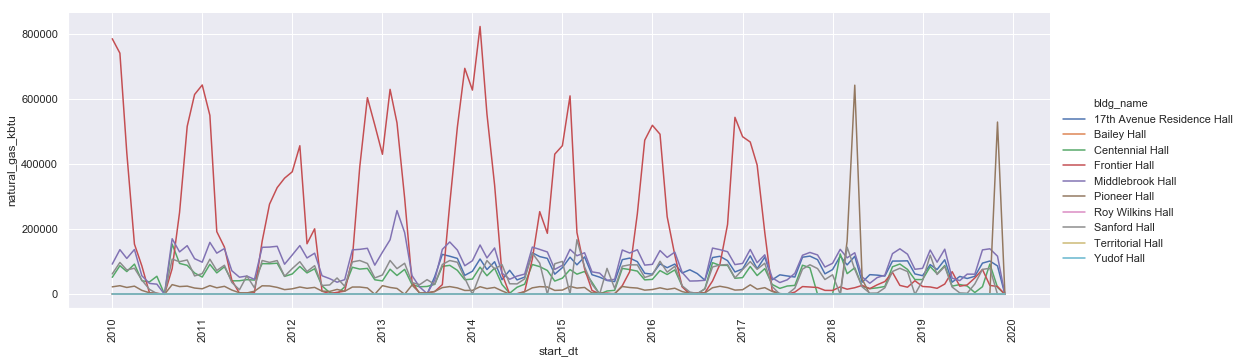

In [103]:
# Visualize natural gas usage over time across the different residence halls
g = sns.relplot(x="start_dt", 
            y="natural_gas_kbtu", 
            hue="bldg_name", kind="line", 
            data=res_hall,
           height=5,
           aspect=3)

g.set_xticklabels(rotation=90) # rotate the charts x-axis labels for readability

# Helpful resource: https://www.drawingfromdata.com/setting-figure-size-using-seaborn-and-matplotlib

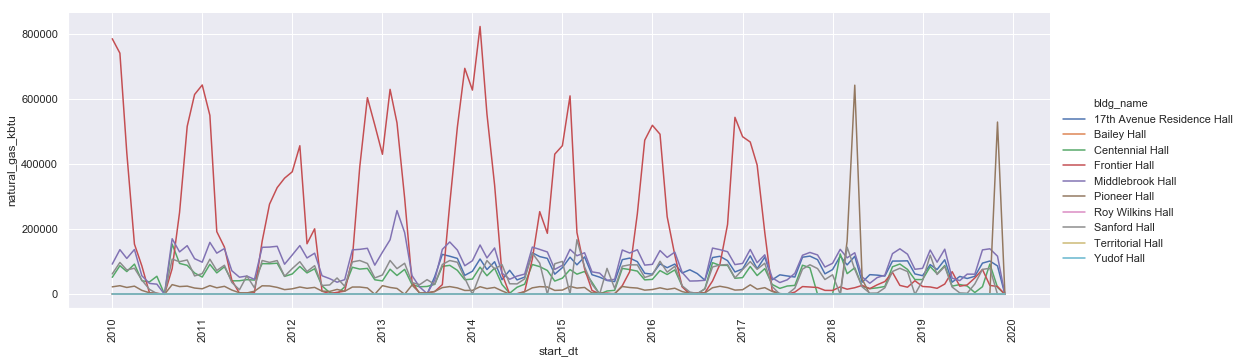

In [106]:
# Visualize natural gas usage over time across the different residence halls
g = sns.relplot(x="start_dt", 
            y="natural_gas_kbtu", 
            hue="bldg_name", kind="line", 
            data=res_hall,
           height=5,
           aspect=3)

g.set_xticklabels(rotation=90) # rotate the charts x-axis labels for readability